In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

the data is already split into training and testing

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


normalize the data

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten (input_shape=(28, 28)))
model.add(tf.keras.layers. Dense (128, activation='relu'))
model.add(tf.keras.layers. Dense (128, activation='relu'))
model.add(tf.keras.layers. Dense (10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=3)
model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1035 - accuracy: 0.9672
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0713 - accuracy: 0.9777
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0519 - accuracy: 0.9829


load model

In [ ]:
model = tf.keras.models.load_model('handwritten.model')
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9750
0.08772658556699753
0.9750000238418579


1/1 [==============================] - 0s 180ms/step
This digit is probably a 5


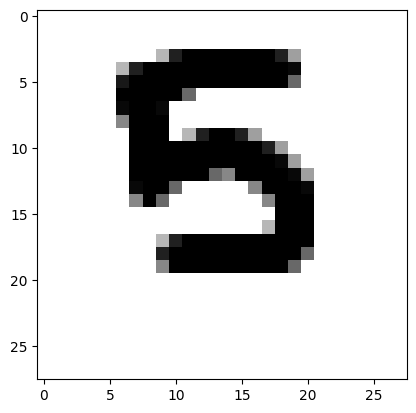

In [ ]:
img = cv2.imread("five.png") [:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
print(f"This digit is probably a {np.argmax(prediction)}")
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()
